In [2]:
# Import Packages
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
# Import functions
from my_functions import *

In [3]:
df_new = pd.read_csv('data/complete_data.csv')
# total number of cars 
N = len(df_new)
# value of cars varies
profit = df_new['Profit']
# size of the cars varies
size = df_new["size"]
# total size of all cars
total_size = np.sum(size)
# parking lot capacity
parkCapacity = 2*total_size/3

# Buying price for each car
buy_price = df_new["Buying Price"]
# total amount of buying cost
total_price = np.sum(buy_price)
# total budget the dealership has
dealBudget = total_price/4

fee_electric = 300
fee_imported = 1000

In [4]:
# Outputs
infoPage(N, profit, total_size, buy_price, parkCapacity, dealBudget)
print("---------------------------------------------------------------")
print("DealershipDecisionOptimizerSystem(DDOS) is working....")
# Solution

#adjusting array sizes to accommodate for penalty fee dummy variables
x = cp.Variable(N+2,integer=True)
s_wdummy=np.append(size, [0, 0])
b_wdummy=np.append(buy_price, [0, 0])
profit_wdummy=np.append(profit, [-fee_electric, -fee_imported])

#creating ILP set up with space and budget constraints
obj = cp.Maximize(cp.sum(cp.multiply(profit_wdummy,x)))
constraints = [cp.sum(cp.multiply(s_wdummy,x)) <= parkCapacity,
               cp.sum(cp.multiply(b_wdummy,x)) <= dealBudget,
               x <= 1, x >= 0]

#adding constraints for dummy e>=x_j, e<= sum(x_j) for all electric cars j and i>=x_k, i<=sum(x_k) for all imported cars k
e_sum=np.zeros(N+2)
i_sum=np.zeros(N+2)

df_new = df_new.reset_index(drop=True)
for k in range(len(df_new)):
    if ((df_new.loc[k, 'fuel_type'].lower() == 'Hybrid') or (df_new.loc[k, 'fuel_type'].lower() == 'Plug-In Hybrid')):
        constraints.append(x[k] >= x[N-2])
        e_sum[k]=1
    elif df_new.loc[k, 'imported'] == '1':
        constraints.append(x[k] >= x[N-1])
        i_sum[k]=1

constraints.append(cp.sum(cp.multiply(e_sum,x)) <= x[N-2])
constraints.append(cp.sum(cp.multiply(i_sum,x)) <= x[N-1])
	
prob = cp.Problem(obj,constraints)
prob.solve()
print("---------------------------------------------------------------")
print(np.sum(x.value), "cars sold")
print("Profit: $", profit_wdummy@x.value)
print("Actual Size of cars sold: ", s_wdummy@x.value, "m^2")
print("Actual budget spent: $", b_wdummy@x.value)

Total Number of cars ready to sell:  3223
Total car value: $ 26420798.85
Total Size of cars:  28942 m^2
Total buying cost amount: $ 106834878.15
------------------------------------------
Parking Lot Capacity:  19294.666666666668 m^2
Available Budget Amount: $ 26708719.5375
---------------------------------------------------------------
DealershipDecisionOptimizerSystem(DDOS) is working....
---------------------------------------------------------------
339.0 cars sold
Profit: $ 8301576.5
Actual Size of cars sold:  3032.0 m^2
Actual budget spent: $ 26708597.5


## Some data analysis on profit of different types of cars

In [5]:
unique_brands = df_new["brand"].unique()
unique_fuel = df_new["fuel_type"].unique()

In [6]:
algorithm_selected_index = [i for i, val in enumerate (x.value) if val == 1]

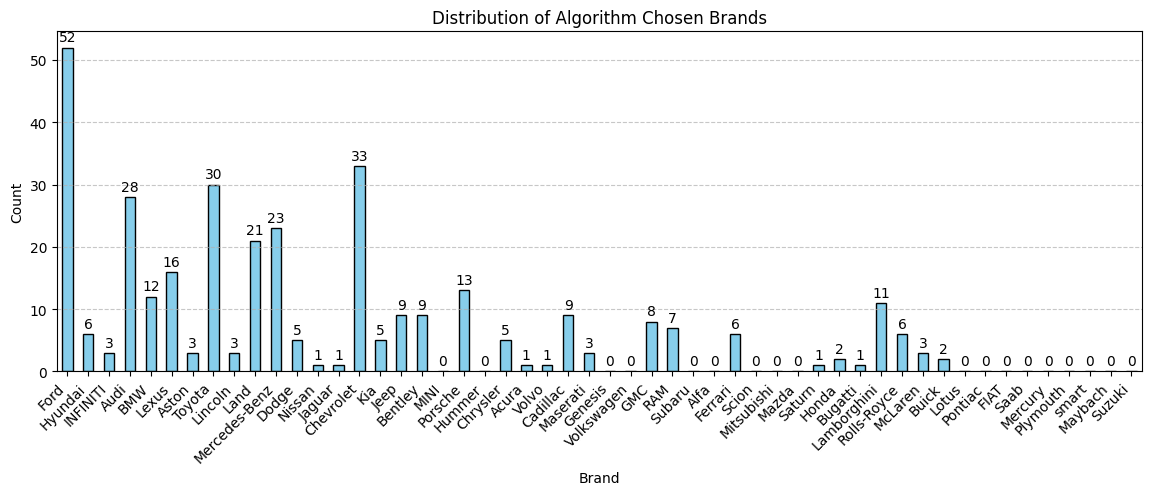

In [10]:
# Create a pandas categorical series with all brands included
selected_brand = pd.Categorical(df_new.loc[algorithm_selected_index, "brand"], categories=unique_brands, ordered=True)

# Count the occurrences while including zero counts for missing brands
brand_counts = pd.Series(selected_brand).value_counts().sort_index()

# Plot the updated bar chart
plt.figure(figsize=(14, 5))
brand_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Distribution of Algorithm Chosen Brands")
plt.xticks(rotation=45, ha="right", fontsize=10)  # Reduce font size
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.subplots_adjust(bottom=0.2)  # Add padding to prevent label cutoff
for i, value in enumerate(brand_counts):
    plt.text(i,value +0.5, str(value), ha="center", va="bottom", fontsize=10)
plt.savefig("data/algo_brand.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
hybrid__profit = df_new[df_new['fuel_type'].isin(['Hybrid'])]['Profit'].mean()
plug_in_profit = df_new[df_new['fuel_type'].isin(['Plug-In Hybrid'])]['Profit'].mean()

# Calculate the mean profit for Gasoline cars
gasoline_profit = df_new[df_new['fuel_type'] == 'Gasoline']['Profit'].mean()

# Print the results
print("Mean profit for Hybrid or Plug-In Hybrid cars:", hybrid__profit)
print("Mean profit for Plug-In Hybrid cars:", plug_in_profit)
print("Mean profit for Gasoline cars:", gasoline_profit)

Mean profit for Hybrid or Plug-In Hybrid cars: 17037.463448275863
Mean profit for Plug-In Hybrid cars: 2188.136363636364
Mean profit for Gasoline cars: 8122.0924333925395


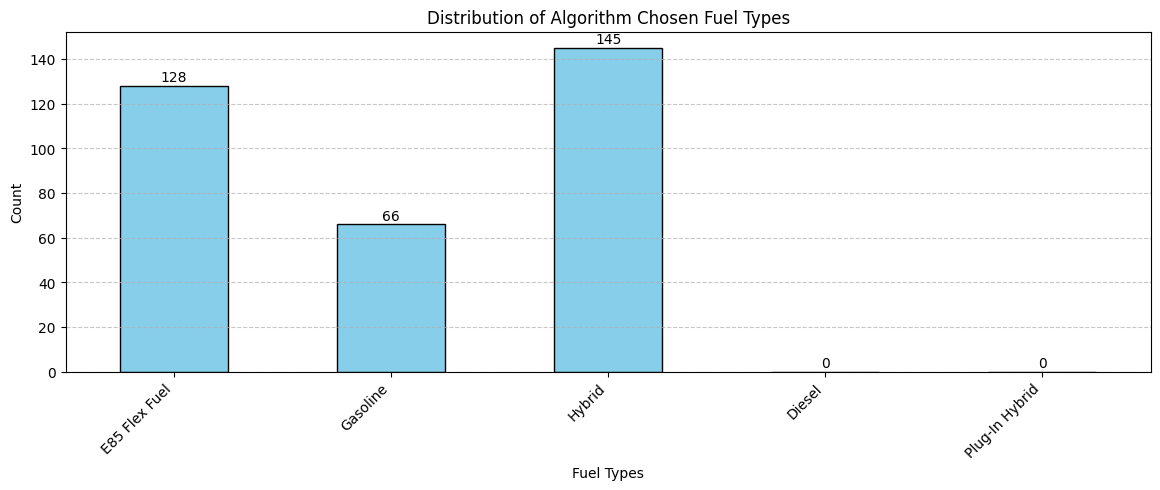

In [9]:
algorithm_selected_fuel = pd.Categorical(df_new.loc[algorithm_selected_index, "fuel_type"], categories=unique_fuel, ordered=True)
fuel_counts = pd.Series(algorithm_selected_fuel).value_counts().sort_index()


# Plot the updated bar chart
plt.figure(figsize=(14, 5))
fuel_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Fuel Types")
plt.ylabel("Count")
plt.title("Distribution of Algorithm Chosen Fuel Types")
plt.xticks(rotation=45, ha="right", fontsize=10)  # Reduce font size
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.subplots_adjust(bottom=0.2)  # Add padding to prevent label cutoff
for i, value in enumerate(fuel_counts):
    plt.text(i,value +0.5, str(value), ha="center", va="bottom", fontsize=10)
plt.savefig("data/algo_fuel.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
import_profit = df_new[df_new['imported'] == 1]['Profit'].mean()

# Calculate the mean profit for Gasoline cars
non_import_profit = df_new[df_new['imported'] == 0]['Profit'].mean()

# Print the results
print("Mean profit for import cars:", import_profit)
print("Mean profit for domestic cars:", non_import_profit)

Mean profit for import cars: 7763.693885601577
Mean profit for domestic cars: 8585.323413631022


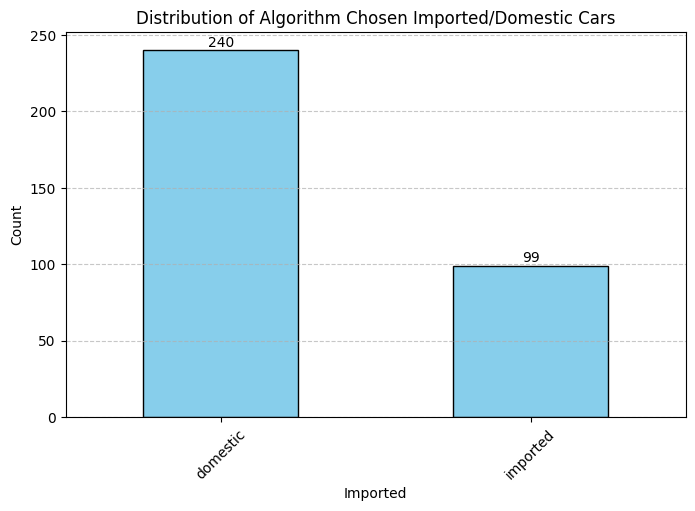

In [11]:
algorithm_selected_import = df_new.loc[algorithm_selected_index, "imported"].map({0: 'domestic', 1: 'imported'})
import_counts = algorithm_selected_import.value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
import_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Imported")
plt.ylabel("Count")
plt.title("Distribution of Algorithm Chosen Imported/Domestic Cars")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(import_counts):
    plt.text(i,value +0.5, str(value), ha="center", va="bottom", fontsize=10)
plt.savefig("data/algo_import.png", dpi=300, bbox_inches="tight")
plt.show()